# Tidying the 2008 Olympics Medalists Dataframe!

First, I imported the Pandas package, which allows me to use certain functions. Then, I used the read_csv function to import the 2008 Olympics Medalists dataframe, which I then stored as df_medalists.

In [290]:
# Imports pandas because I needed to use some functions within the pandas library
import pandas as pd

#Uses the read_csv function in pandas to import the csv, which I then assigned to a variable df_medalist
df_medalists = pd.read_csv("olympics_08_medalists.csv")


This dataframe was super messy so I needed to tidy it up. Tidy datasets have each variable in its own column and each observation in its own row. Tidy datasets are important because they are easy to navigate and understand. Even if you know very little about a topic, a tidy dataset with visualizations and pivot tables makes it easy for anyone to naviaget, no matter their background or expertise.

I used the melt function which creates a tidy dataset. I then named the new column as "Competition", and I assigned the new, melted dataframe to the variable df_medalists_melted.

In [291]:
#Uses the melt function, which organizes the dataset and gathers columns into rows
#df_medalists is the name of the column I wanted to rearrange
df_medalists_melted = pd.melt(df_medalists,
#medalist_name is the column I was going off of
        id_vars=["medalist_name"],
#I unpivoted all of the following columns into rows
        value_vars = df_medalists.columns[1:],
#I named the new column Competition
        var_name= "Competition")

From there, I changed the names of each of the columns to be more organized and easy to understand.

In [292]:
#Renames the medalist_name column to Medalist Name and the value column to Medal
df_medalists_melted = df_medalists_melted.rename(columns = {
    "medalist_name": "Medalist Name",
    "value": "Medal"})

Because the Competition column contained both the gender and sport, separated by an underscore, I used the split function to separate it into two columns, one titled Gender and the other titled Competition.

In [293]:
#Splits the Competition column based on the Underscore
split_columns = df_medalists_melted["Competition"].str.split("_", expand=True)
#Takes the first part of the split and adds it to the df_medalists_melted dataframe into a column named Gender
df_medalists_melted["Gender"] = split_columns[0]
#Takes the second part of the split and adds it to the df_medalists_melted dataframe into a column named Competition
df_medalists_melted["Competition"] = split_columns[1]


From there, because the Gender column was all the way to the right, I thought it would make more sense to have the Gender column right after the Medalist Name, so I rearranged the order of the columns.

In [294]:
#Rearranges the columns so that Gender comes between Medalist Name and Competition
df_medalists_melted = df_medalists_melted[["Medalist Name", "Gender", "Competition", "Medal"]]

I didn't like how the Medal column had NaN, so I used the replace function to have the blank values say None instead. Additionally, this would allow me to remove those observations from the dataframe.

In [295]:
#Turns all of the blank (NaN) columns into strings and then replaces them with None
df_medalists_melted["Medal"] = df_medalists_melted["Medal"].astype(str).str.replace("nan", "None")

I didn't think it made sense to have observations for people who didn't receive Medals in that competition in the Dataframe, so I removed them by only keeping the rows . That way, users are only looking at Medalists who won medals in their respective competitions.

In [296]:
#Only keeps the rows that have values other than None in the Medal column
df_medalists_melted = df_medalists_melted[df_medalists_melted["Medal"] != "None"]

Because I removed many rows, the updated dataframe had an index that didn't correspond to the row number. I wanted to have the index show which row it was so I used the reset_index function to do so.

In [297]:
#Resets the index due to the updated number of rows
df_medalists_melted = df_medalists_melted.reset_index()

When I reset the index, it added a new column titled "index" that I didn't want in the dataframe, so I removed it using the drop function.

In [298]:
#Removes the index column that was created when I reset the index
df_medalists_melted = df_medalists_melted.drop(columns=["index"])

Now, I felt great about how neat the new, tidy dataframe looked. I displayed the entire dataset, and then displayed the dimensions of it.

In [299]:
#Dispays the tidy dataset
display(df_medalists_melted)

#Displays the dimensions of the final dataset
display(df_medalists_melted.shape)

,Medalist Name,Gender,Competition,Medal
0,Bair Badënov,male,archery,bronze
1,Ilario Di Buò,male,archery,silver
2,Im Dong-hyun,male,archery,gold
3,Jiang Lin,male,archery,bronze
4,Lee Chang-hwan,male,archery,gold
...,...,...,...,...
1870,Steeve Guénot,male,greco-roman wrestling,gold
1871,Yannick Szczepaniak,male,greco-roman wrestling,bronze
1872,Yavor Yanakiev,male,greco-roman wrestling,bronze
1873,Yury Patrikeyev,male,greco-roman wrestling,bronze


(1875, 4)

Now that the dataset is finished and tidy, I created a pivot table that shows how many unique medalists there were for each type of medal, based on their gender.

In [300]:
#Creates pivot table from the dataframe, showing the number of unique values of medalist names, organized by medal and gender
#Uses the df_medalists_melted dataframe
medalists_by_medal = pd.pivot_table(df_medalists_melted,
#Groups by the type of medal for the index
               index="Medal",
#Organizes by the gender for the headings
               columns = "Gender",
#The column that is being aggregated is Medalist Name
               values = "Medalist Name",
#Counts the number of unique values
               aggfunc= "nunique")

#Displays the pivot table
display(medalists_by_medal)

Gender,female,male
Medal,,
bronze,294,374
gold,271,315
silver,278,343


Data visualization is important because it makes the data even easier to understand. It allows a user to briefly look at it and understand what the data is portraying. Rather than having to go through a dataframe line-by-line and thinking about what the data is saying, a visualization makes the data easy to understand right away, allowing the user to form takeaways.

Now, I created a visualization. Using matplotlib, I created a bar chart to look at how many times each type of medal was won at the Olympics.

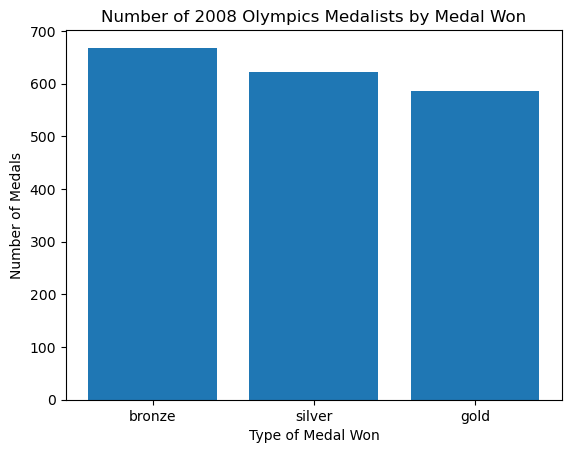

In [301]:
#Imports matplotlib which is used to create visualizations
import matplotlib.pyplot as plt

#Creates a new variable that contains each type of medal and how many times it occurred
medal_frequencies = df_medalists_melted["Medal"].value_counts()

#Creates a bar chart with type of medal on the x-axis and frequency on the y-axis
plt.bar(medal_frequencies.index, medal_frequencies.values)

#Creates an x-axis label
plt.xlabel("Type of Medal Won")

#Creates a y-axis label
plt.ylabel("Number of Medals")

#Creates a title for the bar chart
plt.title("Number of 2008 Olympics Medalists by Medal Won")

#Displays the bar chart
plt.show()


The above visualization makes it easy for a user to quickly glance at the data and see how out of the 2008 Olympic medalists, the most frequent medal won was the bronze medal and the least was the gold medal.

Finally, I created a bar chart that shows the number of medalists by their gender.

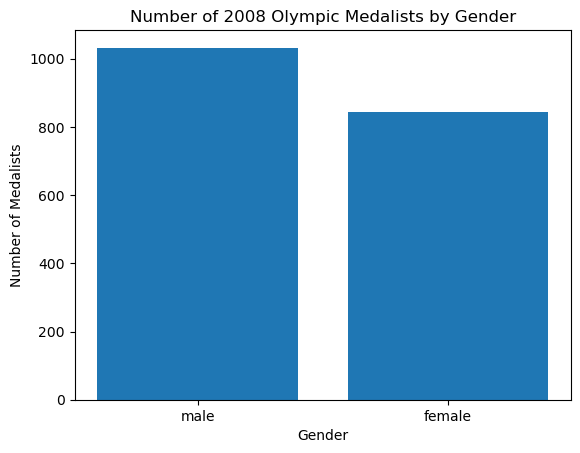

In [302]:
#Creates a new variable that contains each gender and how many times it shows up in the column
gender_frequencies = df_medalists_melted["Gender"].value_counts()

#Creates a bar chart with type of gender on the x-axis and frequency on the y-axis
plt.bar(gender_frequencies.index, gender_frequencies.values)

#Creates an x-axis label
plt.xlabel("Gender")

#Creates a y-axis label
plt.ylabel("Number of Medalists")

#Creates a title for the bar chart
plt.title("Number of 2008 Olympic Medalists by Gender")

#Displays the bar chart
plt.show()

By looking at the visualization above, a user can easily understand how in the 2008 Olympics, more medals were won by men than women. 

In conclusion, by taking an untidy dataset and applying code to tidy it up and visualize it, the data is so much easier to understand and form conclusions on. Neat, right?